# Reproducing Table 1 and 2

This notebook contains the full runnable code to reproduce our result in Table 1 and 2.

- Table 1: Car-Easy
- Table 2: Car-Hard

In [8]:
import math

import numpy as np

import gym
from gym import spaces
from gym.utils import seeding

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

In [9]:
def flatten(regular_list):
    flat_list = [item for sublist in regular_list for item in sublist]
    return flat_list

In [10]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h, h

## Table 1: Car-Easy

We are not fixing random seed, therefore the numbers might be different from the paper, though it does not change our overall story.

For the easy environment, both HoareLSTM and Contrastive HoareLSTM can capture the dynamics of both single-direction policy and random policy.

In [6]:
from car.training import train_naive_hoare_lstm_model_inner, collect_classifier_behavior_on_traj, train_naive_sae_lstm_model, train_naive_vae_model, train_naive_gmm_model, train_naive_supervised_classifier, train_naive_hoare_lstm_model, train_naive_sae_lstm_model_inner, collect_sae_classifier_behavior_on_traj
from car.classifiers import HoareLSTM
from car.car_agents import Agent, RandomSingleDirectionPolicy, SingleDirectionPolicy
from car.utils import fill_na_with_mean

from car.rl_training import train_dqn, compute_perc_traj_with_bug, train_dqn_sae

import torch.optim as optim

from collections import deque
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, precision_recall_fscore_support

from car.car import CarEnv

In [ ]:
for history_window in [5]:
    
    # MLP model
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(5):
        policy = SingleDirectionPolicy()
        test_accu, prec, recall = train_naive_supervised_classifier(policy, env, bug_env, 100, history_window=5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
        
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('MLP Model, 5 Frames, Single Direction Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(5):
        policy = RandomSingleDirectionPolicy()
        test_accu, prec, recall = train_naive_supervised_classifier(policy, env, bug_env, 100, history_window=5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('MLP Model, 5 Frames, Random Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    # GMM model
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(10):
        policy = SingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_gmm_model(policy, env, bug_env, 100, history_window=5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
        
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('GMM Model, 5 Frames, Single Direction Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(5):
        policy = RandomSingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_gmm_model(policy, env, bug_env, 100, history_window=5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('GMM Model, 5 Frames, Random Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))

In [ ]:
for history_window in [5]:  # 20, 50
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(5):
        policy = SingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_vae_model(policy, env, bug_env, 150, history_window=history_window, cuda=True)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('PyTorch VAE, 5 Frames, Single Direction Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(5):
        policy = RandomSingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_vae_model(policy, env, bug_env, 150, history_window=history_window, cuda=True)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('PyTorch VAE, 5 Frames, Random Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))

    
    # next model: SAE
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(3):
        policy = SingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_sae_lstm_model(policy, env, bug_env, 100, 
                                                                                cuda=True, batch_size=4, 
                                                                                threshold_offset=0.5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('HoareLSTM, Single Direction Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(3):
        policy = RandomSingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_sae_lstm_model(policy, env, bug_env, 100, 
                                                                                cuda=True, batch_size=4, 
                                                                                threshold_offset=0.2)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('HoareLSTM, Random Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    # Contrastive HoareLSTM
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(3):
        policy = SingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_hoare_lstm_model(policy, env, bug_env, 100, 
                                                                                cuda=True, batch_size=4, 
                                                                                hoare_threshold=0.5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('Contrastive HoareLSTM, Single Direction Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))
    
    accuracies, recalls, precisions = [], [], []
    
    for _ in range(3):
        policy = RandomSingleDirectionPolicy()
        test_accu, prec, recall, _ = train_naive_hoare_lstm_model(policy, env, bug_env, 100, 
                                                                                cuda=True, batch_size=4, 
                                                                                hoare_threshold=0.5)
        accuracies.append(test_accu)
        recalls.append(recall)
        precisions.append(prec)
    
    accuracies = np.array(accuracies)
    recalls = fill_na_with_mean(np.array(recalls))
    precisions = fill_na_with_mean(np.array(precisions))
    
    print('Contrastive HoareLSTM, Random Policy')
    print("accuracy: ${:.1f} \pm {:.1f}$".format(accuracies.mean(axis=0)[-1] * 100, mean_confidence_interval(accuracies[:, -1])[-1] * 100))
    print("precision: ${:.1f} \pm {:.1f}$".format(precisions.mean(axis=0)[-1] * 100, mean_confidence_interval(precisions[:, -1])[-1] * 100))
    print("recall: ${:.1f} \pm {:.1f}$".format(recalls.mean(axis=0)[-1] * 100, mean_confidence_interval(recalls[:, -1])[-1] * 100))

## Table 2: Car-Hard

Here, we demonstrate the potential of collaborative training.

Each cell contains the training / evaluation code for a full run, starting from random agent initialization (first column), to collaborative training first iteration (CT - Iteration 1) to second iteration (CT - Iteration 2).

We present the code in reverse order -- Contrastive HoareLSTM first, and baseline methods later.

**How to read the result**

We are averaging over 3 runs, each run consists of 3 evaluations and 2 iterations of training (initial, CT 1, CT 2).

```python
print(np.array(accus_runs).mean(axis=0))
print(np.array(precs_runs).mean(axis=0))
print(np.array(recs_runs).mean(axis=0))
```

This block will output something like:

```
            Initial      CT1        CT2
Accuracy    [0.98496583 0.98931373 0.98959953]
Precision   [1. 1. 1.]
Recall.     [0.90868835 0.97522616 0.9822013 ]
```

In [4]:
env = CarEnv(bug=False, mode='hard')
bug_env = CarEnv(bug=True, mode='hard')

bug_env.medium_high_end = 7
bug_env.medium_low_end = 4
bug_env.medium_easiness = 0.3

bug_env

CarEnv mode hard, trigger: (7, 4), Easiness: 0.3

In [5]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UndefinedMetricWarning)

### Contrastive HoareLSTM

  0%|          | 0/500 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 3/1500 [00:00<00:50, 29.67it/s]

Initial
0.9924812030075187
1.0
0.9130434782608695


100%|██████████| 1500/1500 [00:56<00:00, 26.39it/s]


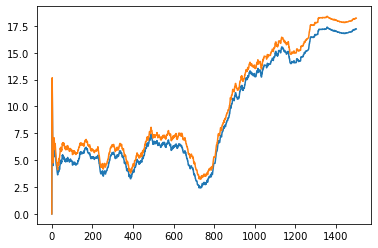

  0%|          | 3/1000 [00:00<00:43, 22.72it/s]

First iteration
0.97
1.0
0.9510869565217391


100%|██████████| 1000/1000 [00:42<00:00, 23.33it/s]


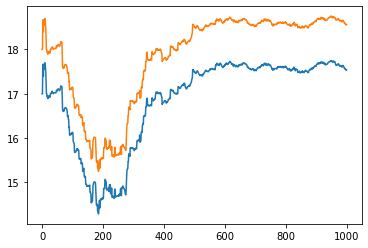

  0%|          | 0/500 [00:00<?, ?it/s]

Second iteration
0.9766666666666667
0.9944444444444445
0.9675675675675676


  0%|          | 4/1500 [00:00<00:46, 32.16it/s]

Initial
0.9888888888888889
1.0
0.8125


100%|██████████| 1500/1500 [00:56<00:00, 26.43it/s]


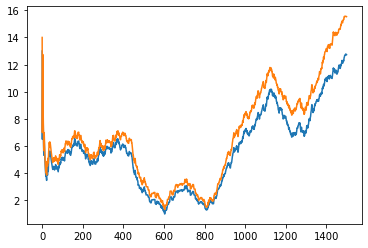

  0%|          | 3/1000 [00:00<00:44, 22.43it/s]

First iteration
0.9716312056737588
1.0
0.9473684210526315


100%|██████████| 1000/1000 [00:41<00:00, 23.82it/s]


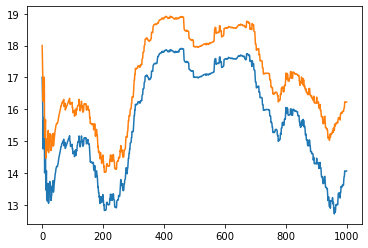

  0%|          | 0/500 [00:00<?, ?it/s]

Second iteration
0.97
1.0
0.9516129032258065


  0%|          | 5/1500 [00:00<00:31, 48.12it/s]

Initial
0.9807692307692307
1.0
0.9206349206349206


100%|██████████| 1500/1500 [00:52<00:00, 28.36it/s]


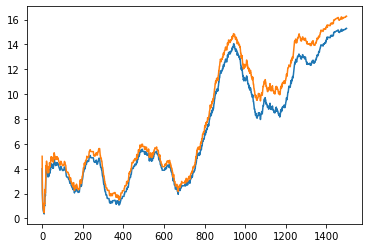

  0%|          | 3/1000 [00:00<00:43, 22.83it/s]

First iteration
0.9633333333333334
0.9861111111111112
0.9403973509933775


100%|██████████| 1000/1000 [00:42<00:00, 23.51it/s]


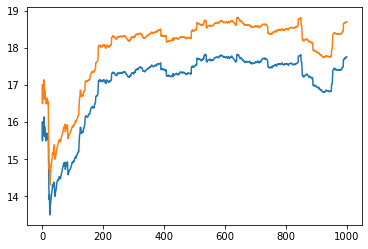

100%|██████████| 250/250 [00:36<00:00,  6.92it/s]

Second iteration
0.9929577464788732
1.0
0.9879518072289156


In [11]:
accus_runs, precs_runs, recs_runs = [], [], []

for _ in range(3):

    accus, precs, recs = [], [], []

    action_input = True
    delta = True
    cuda = True
    batch_size = 128

    lstm = HoareLSTM(4, batch_size=batch_size, delta=delta,
                     action_input=action_input)
    if cuda:
        lstm = lstm.to('cuda')
    optimizer = optim.Adam(lstm.parameters(), lr=1e-3)
    
    bug_lstm = HoareLSTM(4, batch_size=batch_size, delta=delta, action_input=action_input)
    if cuda:
        bug_lstm = bug_lstm.to('cuda')
    bug_optimizer = optim.Adam(bug_lstm.parameters(), lr=1e-3)


    policy = RandomSingleDirectionPolicy()
    test_accu, bug_precision, bug_recall, info = train_naive_hoare_lstm_model_inner(policy, lstm, bug_lstm, optimizer, bug_optimizer, env, bug_env, 
                                                                             epochs=500,
                                                                             cuda=cuda, action_input=action_input, eps=0.05,
                                                                             correct_training_epoch=5, 
                                                                             broken_training_epochs=5,
                                                                             hoare_threshold=0.5)

    # initial agent
    print("Initial")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # First iteration
    agent = Agent(4, 4, 1234, lr=1e-3)

    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn(agent, bug_env, lstm, bug_lstm,
                                                                     n_episodes=1500,
                                                                     action_input=True, use_grader=True, hoare_threshold=1.5,
                                                                     eps_start=0.1,
                                                                     cuda=True)
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # First iteration
    test_accu, bug_precision, bug_recall, info = train_naive_hoare_lstm_model_inner(agent, lstm, bug_lstm, optimizer, bug_optimizer, env, bug_env, 
                                                                             epochs=250,
                                                                             cuda=cuda, action_input=action_input, eps=0.05,
                                                                             correct_training_epoch=5, 
                                                                             broken_training_epochs=5,
                                                                             hoare_threshold=0.5)
    
    # First iteration
    print("First iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # Second iteration
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn(agent, bug_env, lstm, bug_lstm,
                                                             n_episodes=1000,
                                                             action_input=True, use_grader=True, hoare_threshold=1.5,
                                                             eps_start=0.1,
                                                             cuda=True)
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # Second iteration
    test_accu, bug_precision, bug_recall, info = train_naive_hoare_lstm_model_inner(agent, lstm, bug_lstm, optimizer, bug_optimizer, env, bug_env, 
                                                                             epochs=250,
                                                                             cuda=cuda, action_input=action_input, eps=0.05,
                                                                             correct_training_epoch=5, 
                                                                             broken_training_epochs=5,
                                                                             hoare_threshold=0.5)
    
    # Second iteration
    print("Second iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    accus_runs.append(accus); precs_runs.append(precs); recs_runs.append(recs)

In [12]:
# average over 3 runs

print(np.array(accus_runs).mean(axis=0))
print(np.array(precs_runs).mean(axis=0))
print(np.array(recs_runs).mean(axis=0))

[0.98737977 0.96832151 0.9798748 ]
[1.         0.99537037 0.99814815]
[0.88205947 0.94628424 0.96904409]


### HoareLSTM

In [ ]:
accus_runs, precs_runs, recs_runs = [], [], []

for _ in range(5):

    accus, precs, recs = [], [], []

    action_input = True
    delta = True
    cuda = True
    batch_size = 128

    lstm = HoareLSTM(4, batch_size=batch_size, delta=delta,
                     action_input=action_input)
    if cuda:
        lstm = lstm.to('cuda')
    optimizer = optim.Adam(lstm.parameters(), lr=1e-3)


    policy = RandomSingleDirectionPolicy()
    test_accu, bug_precision, bug_recall, info = train_naive_sae_lstm_model_inner(policy, lstm, optimizer, 
                                                                                  env, bug_env, 100, 
                                                                                    cuda=True, batch_size=batch_size, 
                                                                                    threshold_offset=2.0,
                                                                                   delta=True, action_input=True)

    # initial agent
    print("Initial")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # First iteration
    agent = Agent(4, 4, 1234, lr=1e-3)

    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_sae(agent, bug_env, lstm,
                                                 n_episodes=1500,
                                                 action_input=True, use_grader=True, threshold_offset=2.0,
                                                 eps_start=0.1,
                                                 cuda=True)
    #plt.plot(scores)
    #plt.plot(true_rewards)
    #plt.show()
    
    # First iteration
    test_accu, bug_precision, bug_recall, info = train_naive_sae_lstm_model_inner(agent, lstm, optimizer, 
                                                                                  env, bug_env, 50, 
                                                                                    cuda=True, batch_size=batch_size, 
                                                                                    threshold_offset=2.0,
                                                                                   delta=True, action_input=True)
    
    # First iteration
    print("First iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # Second iteration
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_sae(agent, bug_env, lstm,
                                                 n_episodes=1000,
                                                 action_input=True, use_grader=True, threshold_offset=2.0,
                                                 eps_start=0.1,
                                                 cuda=True)
    #plt.plot(scores)
    #plt.plot(true_rewards)
    #plt.show()
    
    # Second iteration
    test_accu, bug_precision, bug_recall, info = train_naive_sae_lstm_model_inner(agent, lstm, optimizer, 
                                                                                  env, bug_env, 50, 
                                                                                    cuda=True, batch_size=batch_size, 
                                                                                    threshold_offset=2.0,
                                                                                   delta=True, action_input=True)
    
    # Second iteration
    print("Second iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    accus_runs.append(accus); precs_runs.append(precs); recs_runs.append(recs)

In [ ]:
# average over 3 runs

print(np.array(accus_runs).mean(axis=0))
print(np.array(precs_runs).mean(axis=0))
print(np.array(recs_runs).mean(axis=0))

### VAE

In [14]:
from car.rl_training import train_dqn_vae, train_dqn_gmm, train_dqn_mlp
from car.classifiers import VAE
from car.training import train_naive_vae_model_inner, train_naive_gmm_model_inner, train_naive_supervised_classifier_inner

from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier

In [15]:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
accus_runs, precs_runs, recs_runs = [], [], []

for _ in range(3):

    accus, precs, recs = [], [], []
    
    feat_dim = 4
    cuda = True
    history_window = 5

    model = VAE(feat_dim * history_window)
    if cuda:
        model = model.to('cuda')

    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    rand_policy = RandomSingleDirectionPolicy()
    test_accu, bug_precision, bug_recall, (model, train_losses) = train_naive_vae_model_inner(rand_policy, model, optimizer, env, bug_env, 500, history_window=history_window, cuda=True)
     

    # initial agent
    print("Initial")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # First iteration
    agent = Agent(4, 4, 1234, lr=1e-3)
    vae_threshold = np.mean(train_losses[-100:])
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_vae(agent, bug_env, model, n_episodes=1500,
                                  eps_start=0.1, vae_threshold=vae_threshold, history_window=5,
                                  cuda=True)
    
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # First iteration
    test_accu, bug_precision, bug_recall, (model, train_losses) = train_naive_vae_model_inner(agent, model, optimizer, env, bug_env, 500, history_window=history_window, cuda=True)
    
    # First iteration
    print("First iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # Second iteration
    # np.mean(train_losses[-100:])
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_vae(agent, bug_env, model, n_episodes=1000,
                                  eps_start=0.1, vae_threshold=vae_threshold, history_window=5,
                                  cuda=True)
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # Second iteration
    test_accu, bug_precision, bug_recall, (model, train_losses) = train_naive_vae_model_inner(agent, model, optimizer, env, bug_env, 500, history_window=history_window, cuda=True)
    
    # Second iteration
    print("Second iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    accus_runs.append(accus); precs_runs.append(precs); recs_runs.append(recs)

In [ ]:
# average over 3 runs

print(np.array(accus_runs).mean(axis=0))
print(np.array(precs_runs).mean(axis=0))
print(np.array(recs_runs).mean(axis=0))

### GMM

In [ ]:
accus_runs, precs_runs, recs_runs = [], [], []

for _ in range(3):

    accus, precs, recs = [], [], []
    
    rand_policy = RandomSingleDirectionPolicy()
    model = GaussianMixture(n_components=8, covariance_type='full', max_iter=500)
    test_accu, bug_precision, bug_recall, (model, normalizer, train_losses) = train_naive_gmm_model_inner(rand_policy, 
                                                                                             model, env, 
                                                                                             bug_env, epochs=100, history_window=history_window)
     
     

    # initial agent
    print("Initial")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # First iteration
    agent = Agent(4, 4, 1234, lr=1e-3)
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_gmm(agent, bug_env, model, normalizer, n_episodes=1500,
                                                                  eps_start=0.1, history_window=5)
    
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # First iteration
    test_accu, bug_precision, bug_recall, (model, normalizer, train_losses) = train_naive_gmm_model_inner(agent, 
                                                                                             model, env, 
                                                                                             bug_env, 
                                                                                             epochs=100, history_window=history_window)
    
    # First iteration
    print("First iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # Second iteration
    # np.mean(train_losses[-100:])
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_gmm(agent, bug_env, model, normalizer, n_episodes=1500,
                                                                  eps_start=0.1, history_window=5)
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # Second iteration
    test_accu, bug_precision, bug_recall, (model, normalizer, train_losses) = train_naive_gmm_model_inner(agent, 
                                                                                             model, env, 
                                                                                             bug_env, 
                                                                                             epochs=100, history_window=history_window)
    
    # Second iteration
    print("Second iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    accus_runs.append(accus); precs_runs.append(precs); recs_runs.append(recs)

In [ ]:
# average over 3 runs

print(np.array(accus_runs).mean(axis=0))
print(fill_na_with_mean(np.array(precs_runs)).mean(axis=0))
print(fill_na_with_mean(np.array(recs_runs)).mean(axis=0))

### MLP

In [ ]:
accus_runs, precs_runs, recs_runs = [], [], []

for _ in range(3):

    accus, precs, recs = [], [], []
    
    rand_policy = RandomSingleDirectionPolicy()
    model = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(100, 100), random_state=1,
                        max_iter=5)
    test_accu, bug_precision, bug_recall = train_naive_supervised_classifier_inner(rand_policy, model, env, bug_env, epochs=150, history_window=history_window)


    # initial agent
    print("Initial")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # First iteration
    agent = Agent(4, 4, 1234, lr=1e-3)
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_gmm(agent, bug_env, model, normalizer, n_episodes=1500,
                                                                  eps_start=0.1, history_window=5)
    
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # First iteration
    test_accu, bug_precision, bug_recall = train_naive_supervised_classifier_inner(agent, model, env, bug_env, epochs=150, history_window=history_window)
    
    # First iteration
    print("First iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    # Second iteration
    # np.mean(train_losses[-100:])
    scores, true_rewards, traj_dists, traj_preds, traj_labels = train_dqn_gmm(agent, bug_env, model, normalizer, n_episodes=1500,
                                                                  eps_start=0.1, history_window=5)
    plt.plot(scores)
    plt.plot(true_rewards)
    plt.show()
    
    # Second iteration
    test_accu, bug_precision, bug_recall = train_naive_supervised_classifier_inner(agent, model, env, bug_env, epochs=150, history_window=history_window)
    
    # Second iteration
    print("Second iteration")
    print(test_accu[-1])
    print(bug_precision[-1])
    print(bug_recall[-1])
    
    accus.append(test_accu[-1]); precs.append(bug_precision[-1]); recs.append(bug_recall[-1])
    
    accus_runs.append(accus); precs_runs.append(precs); recs_runs.append(recs)

In [ ]:
# average over 3 runs

print(np.array(accus_runs).mean(axis=0))
print(fill_na_with_mean(np.array(precs_runs)).mean(axis=0))
print(fill_na_with_mean(np.array(recs_runs)).mean(axis=0))